In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None

# Classifiers libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score, confusion_matrix, accuracy_score

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
import graphviz as gviz

In [2]:
#loading dataset

In [3]:
directories = [
#                 r'data/reclamacoes-fundamentadas-sindec-2012.csv', 
#                 r'data/reclamacoes-fundamentadas-sindec-2013.csv', 
#                 r'data/reclamacoes-fundamentadas-sindec-2014.csv', 
#                 r'data/reclamacoes-fundamentadas-sindec-2015.csv',
                 r'data/reclamacoes-fundamentadas-sindec-2016_v2.csv']

datasets = [pd.read_csv(directory, sep=';') for directory in directories]

combined_datasets = pd.concat(datasets,  ignore_index=True)

In [4]:
combined_datasets

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,RadicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
0,2016,2016-04-28 18:43:26.000,2008-10-06 15:39:00.000,1,Norte,TO,CAMP HOUSE COMÉRCIO DE EQUIP. DE SEGURANÇA LTDA,CAMP HOUSE,1,8.512480e+12,8512480.0,CAMP HOUSE - COMERCIO DE EQUIPAMENTOS DE SEGUR...,NaN,4753900.0,COMÉRCIO VAREJISTA ESPECIALIZADO DE ELETRODOMÉ...,N,135,Venda a Domicílio / Reembolso Postal,115.0,Desistência de compra (cancelamento de compra),N,Nao Informada,77020024.0
1,2016,2016-04-15 13:13:07.000,2010-01-06 12:21:33.000,1,Norte,TO,BRASTEMP UTILIDADES DOMÉSTICAS LTDA,COMPRA CERTA BRASTEMP,1,6.205832e+13,62058318.0,BUD COMERCIO DE ELETRODOMESTICOS LTDA,COMPRA CERTA BRASTEMP,4753900.0,COMÉRCIO VAREJISTA ESPECIALIZADO DE ELETRODOMÉ...,N,105,"Artigo de Foto Imagem ( Filme, Ampliador, Lune...",107.0,Não entrega/demora na entrega do produto,F,entre 21 a 30 anos,77600000.0
2,2016,2016-02-15 13:15:18.000,2010-01-18 15:45:36.000,1,Norte,TO,BANCO BRADESCO S/A,BRADESCO AG_2397-3,1,6.074695e+13,60746948.0,BANCO BRADESCO SA,BRADESCO AG. PALMAS - CENTRO EST UNIF,6422100.0,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",N,53,Banco comercial,48.0,Não entrega de copia do contrato,F,entre 41 a 50 anos,77019040.0
3,2016,2016-02-11 20:15:00.000,2010-01-18 17:38:46.000,1,Norte,TO,BANCO ITAÚ UNIBANCO S/A,BANCO ITAÚ MATRIZ,1,6.070119e+13,60701190.0,ITAU UNIBANCO S.A.,EST UNIF,6422100.0,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",N,53,Banco comercial,48.0,Não entrega de copia do contrato,F,entre 41 a 50 anos,NaN
4,2016,2016-02-11 13:35:08.000,2010-06-10 18:09:20.000,1,Norte,TO,ENERGISA TOCANTINS DISTRIBUIDORA DE ENERGIA S/A,ENERGISA TOCANTINS (PALMAS),1,2.508603e+13,25086034.0,COMPANHIA DE ENERGIA ELETRICA DO ESTADO DO TOC...,NaN,3514000.0,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,N,185,Energia Elétrica,134.0,Cobrança indevida/abusiva,M,entre 41 a 50 anos,77570000.0
5,2016,2016-02-19 10:38:53.000,2010-07-28 17:54:42.000,1,Norte,TO,COMIBRÁS LITORAL COMÉRCIO E SERVIÇOS LTDA,VIA PLAN (MATRIZ),1,3.443434e+12,3443434.0,COMIBRAS LITORAL COMERCIO E SERVICOS LTDA,NaN,4753900.0,COMÉRCIO VAREJISTA ESPECIALIZADO DE ELETRODOMÉ...,N,94,Geladeira e Freezer,107.0,Não entrega/demora na entrega do produto,F,entre 31 a 40 anos,77270000.0
6,2016,2016-04-14 15:27:36.000,2010-08-02 17:17:31.000,1,Norte,TO,14 BRASIL TELECOM CELULAR S/A,OI - BRASIL TELECOM (TELEFONIA CELULAR),1,5.423963e+12,5423963.0,14 BRASIL TELECOM CELULAR S/A,OI,6120501.0,TELEFONIA MÓVEL CELULAR,N,187,Telefonia Celular,134.0,Cobrança indevida/abusiva,M,Nao Informada,77020172.0
7,2016,2016-06-28 10:35:26.000,2010-08-31 14:07:19.000,1,Norte,TO,BANCO BRADESCO S/A,BRADESCO AG_2397-3,1,6.074695e+13,60746948.0,BANCO BRADESCO SA,BRADESCO AG. PALMAS - CENTRO EST UNIF,6422100.0,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",N,53,Banco comercial,27.0,"Contrato (não cumprimento, alteração, transfer...",F,entre 31 a 40 anos,77019014.0
8,2016,2016-12-01 15:02:40.000,2015-01-14 12:29:36.000,4,Sul,SC,SKY BRASIL SERVICOS LTDA,SKY BRASIL SERVICOS LTDA - CIP,1,7.282082e+13,72820822.0,SKY BRASIL SERVICOS LTDA,SKY,6143400.0,OPERADORAS DE TELEVISÃO POR ASSINATURA POR SAT...,S,259,"TV Por Assinatura ( Cabo, Satélite, Etc. )",184.0,Serviço não fornecido (entrega/instalação/não ...,M,entre 41 a 50 anos,89202005.0
9,2016,2016-04-14 12:50:45.000,2015-07-20 10:59:27.000,4,Sul,SC,SKY BRASIL SERVICOS LTDA,SKY BRASIL SERVICOS LTDA - CIP,1,7.282082e+13,72820822.0,SKY BRASIL SERVICOS LTDA,SKY,6143400.0,OPERADORAS DE TELEVISÃO POR ASSINATURA POR SAT...,N,259,"TV Por Assinatura ( Cabo, Satélite, Etc. )",194.0,Cobrança indevida/abusiva,M,entre 21 a 30 anos,89228600.0


In [5]:
#removing useless columns

In [6]:
columns_removed=['AnoCalendario','NumeroCNPJ','DescCNAEPrincipal','RadicalCNPJ','RazaoSocialRFB'] #verificar se necessita eliminar mais alguma coluna

In [7]:
combined_datasets.columns

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')

In [8]:
combined_datasets=combined_datasets.drop(columns_removed,axis=1)

In [9]:
combined_datasets.dtypes

DataArquivamento          object
DataAbertura              object
CodigoRegiao               int64
Regiao                    object
UF                        object
strRazaoSocial            object
strNomeFantasia           object
Tipo                       int64
NomeFantasiaRFB           object
CNAEPrincipal            float64
Atendida                  object
CodigoAssunto              int64
DescricaoAssunto          object
CodigoProblema           float64
DescricaoProblema         object
SexoConsumidor            object
FaixaEtariaConsumidor     object
CEPConsumidor            float64
dtype: object

In [10]:
#changing types of columns

In [11]:
combined_datasets['DataAbertura']=pd.to_datetime(combined_datasets['DataAbertura'])
combined_datasets['DataArquivamento']=pd.to_datetime(combined_datasets['DataArquivamento'])
combined_datasets.dtypes

DataArquivamento         datetime64[ns]
DataAbertura             datetime64[ns]
CodigoRegiao                      int64
Regiao                           object
UF                               object
strRazaoSocial                   object
strNomeFantasia                  object
Tipo                              int64
NomeFantasiaRFB                  object
CNAEPrincipal                   float64
Atendida                         object
CodigoAssunto                     int64
DescricaoAssunto                 object
CodigoProblema                  float64
DescricaoProblema                object
SexoConsumidor                   object
FaixaEtariaConsumidor            object
CEPConsumidor                   float64
dtype: object

In [12]:
categorical_columns={'CodigoRegiao':'category','Regiao':'category','UF':'category','strRazaoSocial':'category','strNomeFantasia':'category','Tipo':'category','NomeFantasiaRFB':'category','CNAEPrincipal':'category','Atendida':'category','CodigoAssunto':'category','DescricaoAssunto':'category','CodigoProblema':'category','DescricaoProblema':'category','SexoConsumidor':'category','FaixaEtariaConsumidor':'category','CEPConsumidor':'category'}
combined_datasets=combined_datasets.astype(categorical_columns)
combined_datasets.dtypes

DataArquivamento         datetime64[ns]
DataAbertura             datetime64[ns]
CodigoRegiao                   category
Regiao                         category
UF                             category
strRazaoSocial                 category
strNomeFantasia                category
Tipo                           category
NomeFantasiaRFB                category
CNAEPrincipal                  category
Atendida                       category
CodigoAssunto                  category
DescricaoAssunto               category
CodigoProblema                 category
DescricaoProblema              category
SexoConsumidor                 category
FaixaEtariaConsumidor          category
CEPConsumidor                  category
dtype: object

In [13]:
#adding new column period

In [14]:
combined_datasets['periodo']=(combined_datasets.DataArquivamento-combined_datasets.DataAbertura).apply(lambda x:x.days)
combined_datasets.dtypes

DataArquivamento         datetime64[ns]
DataAbertura             datetime64[ns]
CodigoRegiao                   category
Regiao                         category
UF                             category
strRazaoSocial                 category
strNomeFantasia                category
Tipo                           category
NomeFantasiaRFB                category
CNAEPrincipal                  category
Atendida                       category
CodigoAssunto                  category
DescricaoAssunto               category
CodigoProblema                 category
DescricaoProblema              category
SexoConsumidor                 category
FaixaEtariaConsumidor          category
CEPConsumidor                  category
periodo                           int64
dtype: object

In [15]:
#removing negative periods

In [16]:
#print(combined_datasets.shape)
combined_datasets=combined_datasets.drop(combined_datasets[combined_datasets.periodo<0].index)
#print(combined_datasets.shape)

In [17]:
#removing null values (need review)

In [18]:
print(combined_datasets.shape)
combined_datasets=combined_datasets.dropna()
print(combined_datasets.shape)

(203485, 19)
(79515, 19)


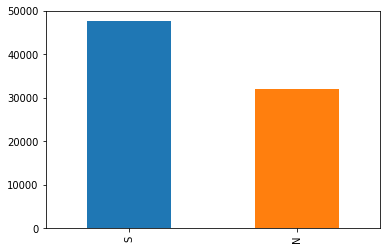

In [19]:
#quantidade de resolvidos x não-resolvidos
combined_datasets['Atendida'].value_counts().T.plot(kind='bar')

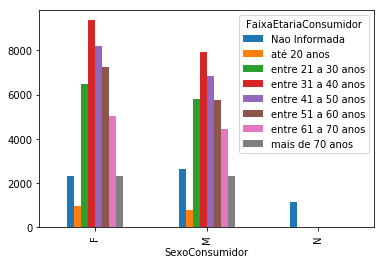

In [20]:
#ocorrencias de reclamações for sexo e faixa etária do consumidor
combined_datasets.groupby(['FaixaEtariaConsumidor','SexoConsumidor']).count()['Atendida'].unstack().T.plot(kind='bar')

In [21]:
from pandas.api.types import CategoricalDtype
faixaEtariaCategories = ["até 20 anos","entre 21 a 30 anos","entre 31 a 40 anos","entre 41 a 50 anos","entre 51 a 60 anos","entre 61 a 70 anos","mais de 70 anos"]
combined_datasets = combined_datasets[combined_datasets.FaixaEtariaConsumidor != "Nao Informada"]
faixaEtariaType = CategoricalDtype(categories=faixaEtariaCategories, ordered=True)
combined_datasets.FaixaEtariaConsumidor = combined_datasets.FaixaEtariaConsumidor.astype(faixaEtariaType)
combined_datasets['FaixaEtariaConsumidorEncoded'] = combined_datasets.FaixaEtariaConsumidor.map(lambda x : faixaEtariaCategories.index(x))
combined_datasets

,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NomeFantasiaRFB,CNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor,periodo,FaixaEtariaConsumidorEncoded
1,2016-04-15 13:13:07,2010-01-06 12:21:33,1,Norte,TO,BRASTEMP UTILIDADES DOMÉSTICAS LTDA,COMPRA CERTA BRASTEMP,1,COMPRA CERTA BRASTEMP,4753900.0,N,105,"Artigo de Foto Imagem ( Filme, Ampliador, Lune...",107.0,Não entrega/demora na entrega do produto,F,entre 21 a 30 anos,77600000.0,2291,1
2,2016-02-15 13:15:18,2010-01-18 15:45:36,1,Norte,TO,BANCO BRADESCO S/A,BRADESCO AG_2397-3,1,BRADESCO AG. PALMAS - CENTRO EST UNIF,6422100.0,N,53,Banco comercial,48.0,Não entrega de copia do contrato,F,entre 41 a 50 anos,77019040.0,2218,3
7,2016-06-28 10:35:26,2010-08-31 14:07:19,1,Norte,TO,BANCO BRADESCO S/A,BRADESCO AG_2397-3,1,BRADESCO AG. PALMAS - CENTRO EST UNIF,6422100.0,N,53,Banco comercial,27.0,"Contrato (não cumprimento, alteração, transfer...",F,entre 31 a 40 anos,77019014.0,2127,2
8,2016-12-01 15:02:40,2015-01-14 12:29:36,4,Sul,SC,SKY BRASIL SERVICOS LTDA,SKY BRASIL SERVICOS LTDA - CIP,1,SKY,6143400.0,S,259,"TV Por Assinatura ( Cabo, Satélite, Etc. )",184.0,Serviço não fornecido (entrega/instalação/não ...,M,entre 41 a 50 anos,89202005.0,687,3
9,2016-04-14 12:50:45,2015-07-20 10:59:27,4,Sul,SC,SKY BRASIL SERVICOS LTDA,SKY BRASIL SERVICOS LTDA - CIP,1,SKY,6143400.0,N,259,"TV Por Assinatura ( Cabo, Satélite, Etc. )",194.0,Cobrança indevida/abusiva,M,entre 21 a 30 anos,89228600.0,269,1
11,2016-12-13 11:36:56,2014-03-19 12:49:50,5,Centro-oeste,DF,SKY BRASIL SERVIÇOS LTDA,SKY,1,SKY,6143400.0,S,259,"TV Por Assinatura ( Cabo, Satélite, Etc. )",185.0,Serviço não concluído /Fornecimento parcial,M,entre 31 a 40 anos,73370100.0,999,2
12,2016-02-22 12:20:37,2015-09-22 16:24:01,5,Centro-oeste,DF,SKY BRASIL SERVIÇOS LTDA,SKY,1,SKY,6143400.0,S,259,"TV Por Assinatura ( Cabo, Satélite, Etc. )",194.0,Cobrança indevida/abusiva,M,entre 61 a 70 anos,72110450.0,152,5
13,2016-10-25 15:46:23,2014-12-29 12:58:09,5,Centro-oeste,MT,SKY DO BRASIL LTDA,SKY DO BRASIL LTDA,1,SKY,6143400.0,N,259,"TV Por Assinatura ( Cabo, Satélite, Etc. )",188.0,Recusa injustificada em prestar serviço,M,entre 51 a 60 anos,78700000.0,666,4
15,2016-04-19 12:38:05,2016-03-14 10:49:48,2,Nordeste,PB,SKY BRASIL SERVICOS LTDA,SKY,1,SKY,6143400.0,S,259,"TV Por Assinatura ( Cabo, Satélite, Etc. )",255.0,"SAC - Cancelamento de serviço (retenção, demor...",M,entre 51 a 60 anos,58070400.0,36,4
17,2016-11-09 17:15:54,2016-08-03 13:59:25,2,Nordeste,BA,SKY BRASIL SERVICOS LTDA,SKY,1,SKY,6143400.0,S,259,"TV Por Assinatura ( Cabo, Satélite, Etc. )",194.0,Cobrança indevida/abusiva,M,entre 41 a 50 anos,46970000.0,98,3


In [22]:
combined_datasets['SexoConsumidor'] = combined_datasets['SexoConsumidor'].map({'M': 1, 'F': 0, 'N': 2})

In [23]:
print ("preparando a base de dados")
dd = combined_datasets[["SexoConsumidor", "CodigoProblema", "periodo", "FaixaEtariaConsumidorEncoded"]]


preparando a base de dados


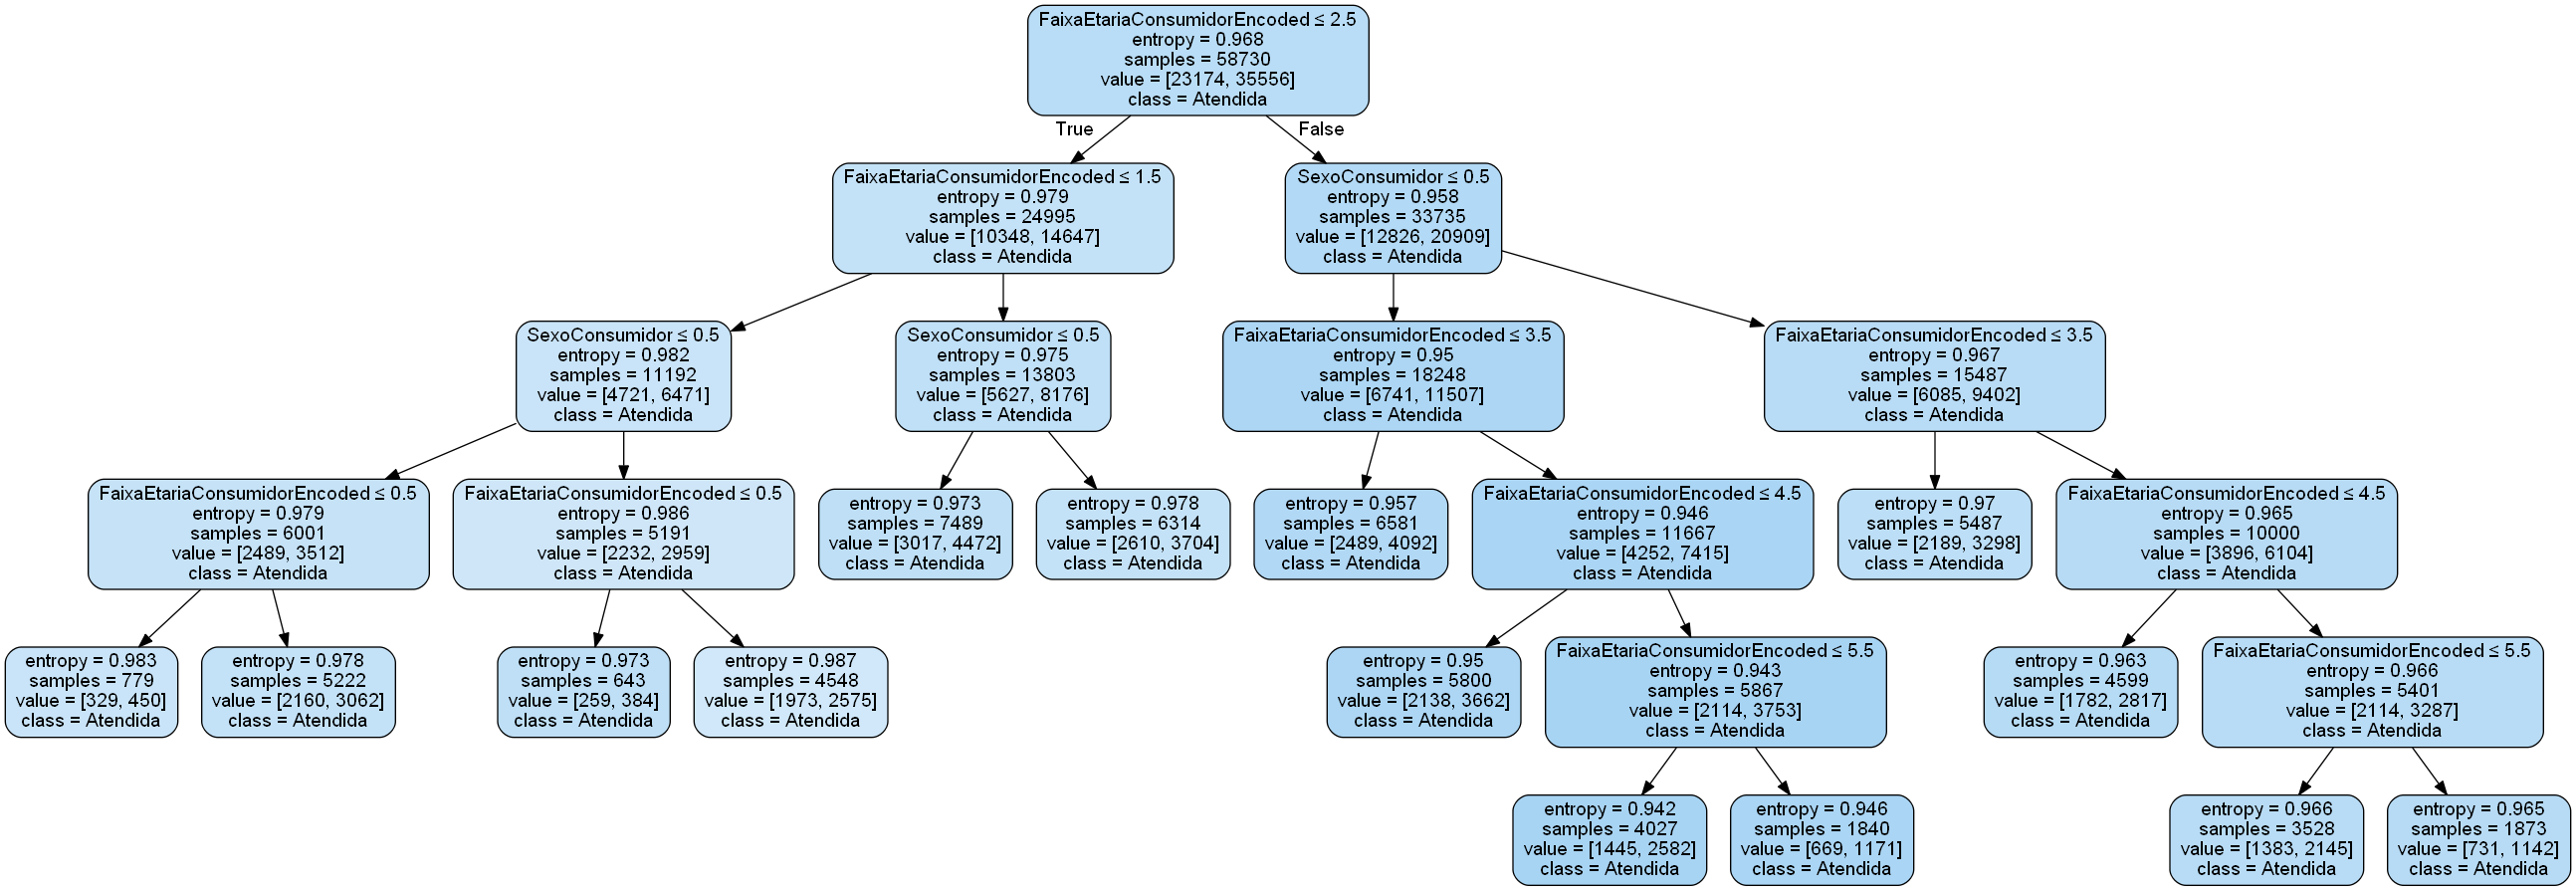

In [24]:
combined_datasets['vendaEnganosa'] = combined_datasets.CodigoProblema.map(lambda x: x == 111 and 'sim' or 'não')
combined_datasets.vendaEnganosa = combined_datasets.vendaEnganosa.astype('category')
combined_datasets.dtypes

#model
train, test = train_test_split(combined_datasets, test_size=1/5, random_state=42)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(min_samples_leaf=10,criterion='entropy')
attrs = ['SexoConsumidor','FaixaEtariaConsumidorEncoded']
model.fit(train[attrs],train.Atendida.map(lambda x: x=='S' and 1 or 0))

from sklearn.tree import export_graphviz
dot_data = export_graphviz(model, out_file=None, 
                         feature_names=attrs,
                         class_names=['Não Atendida','Atendida'],
                         filled=True, rounded=True,
                         special_characters=True)
from io import StringIO
f = StringIO(dot_data)
g = gviz.Source(source=dot_data)
from IPython.display import Image
Image(g.pipe(format='png'),width='100%')
#classify_dataset(combined_datasets,["SexoConsumidor","FaixaEtariaConsumidor"],["vendaEnganosa"])

In [25]:
df_with_dummies = pd.get_dummies(dd, columns=['CodigoProblema', 'SexoConsumidor'])
#df_with_dummies

In [26]:
def dummies(data_frame, collumns):
    return pd.get_dummies(data_frame, columns=columns)

In [27]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def classify_dataset(data_frame, columns, label):
    train, test = train_test_split(data_frame, test_size=1/5, random_state=42)

    print ("separando trainamento e test")

    X_train = train.loc[:,columns].values
    X_test = test.loc[:,columns].values
    y_train = train[label].values
    y_test = test[label].values

    np.set_printoptions(precision=2, suppress=True)

    print ("Executando classificadores")

    #Arvore de decisão
    print ("\nArvore de decisão")
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print ("acc",accuracy_score(y_test, pred))
    print ("MSE",mean_squared_error(y_test, pred))
    cm1 = confusion_matrix(y_test, pred)
    
    # Bayes
    print ("\nBayes")
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print ("acc",accuracy_score(y_test, pred))
    print ("MSE",mean_squared_error(y_test, pred))
    cm2 = confusion_matrix(y_test, pred)
    
    return cm1, cm2

In [28]:
#TESTANDO PARA: O sexo do consumidor, descriçao do problema, perıodo da reclamaçao sao determinantes para deduzir a faixa etaria do consumidor

# falta ainda transformar atributos categoricos em com get_dummies ou one hot enconding

columns = df_with_dummies.loc[:, df_with_dummies.columns != 'FaixaEtariaConsumidorEncoded'].columns.values #colunas que vão ser avaliadas no classificador
label = "FaixaEtariaConsumidorEncoded" #coluna que deve ser predita


cmDT, cmNB = classify_dataset(df_with_dummies, columns, label)


separando trainamento e test
Executando classificadores

Arvore de decisão
acc 0.23952870666757475
MSE 3.8150241776203773

Bayes
acc 0.051351903561942386
MSE 10.153102227065313


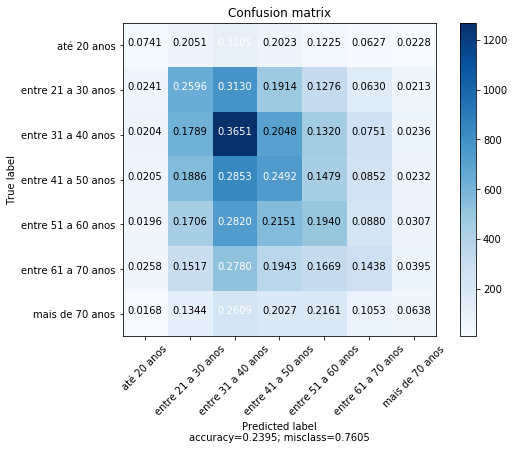

In [29]:
plot_confusion_matrix(cmDT, faixaEtariaCategories)

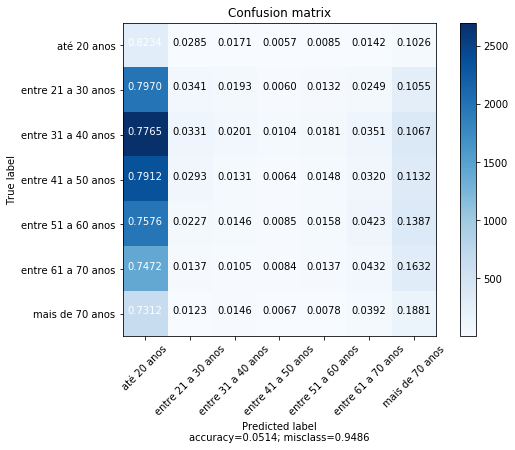

In [30]:
plot_confusion_matrix(cmNB, faixaEtariaCategories)

In [31]:
#É possivel inferir a partir das caracteristicas da reclamação se a reclamação foi resolvida ou não
#não faz sentido prever se vai ser atendida ou não com o período pois se foi fechada não tem pra que prever

combined_datasets['Atendida'] = pd.Series(np.where(combined_datasets['Atendida'].values == 'S', 1, 0), combined_datasets['Atendida'].index)
df = combined_datasets[["CNAEPrincipal", "CodigoProblema", "CodigoRegiao", "Tipo", "CodigoAssunto", "CodigoProblema", "FaixaEtariaConsumidorEncoded", "Atendida"]]
df2 = pd.get_dummies(df)

columns = df2.loc[:, df2.columns != 'Atendida'].columns.values #colunas que vão ser avaliadas no classificador
label = "Atendida" #coluna que deve ser predita
labelsHipotese = ["Não Atendida", "Atendida"]
cmDT, cmNB = classify_dataset(df2, columns, label)


separando trainamento e test
Executando classificadores

Arvore de decisão
acc 0.632976912075189
MSE 0.36702308792481103

Bayes
acc 0.6359735748825172
MSE 0.3640264251174828


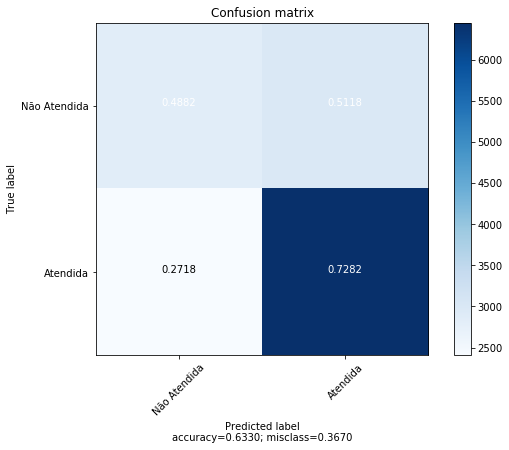

In [32]:
plot_confusion_matrix(cmDT,labelsHipotese)

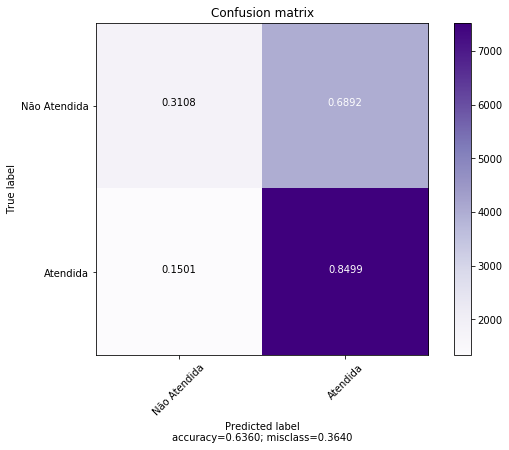

In [33]:
plot_confusion_matrix(cmNB,labelsHipotese,cmap=plt.get_cmap('Purples'))